In [55]:
import numpy as np
import pandas as pd
import scipy.stats as stats
from sklearn import preprocessing
import seaborn as sns
import matplotlib.pyplot as plt

In [40]:
data = pd.read_csv('market_clusters.csv', sep=',', encoding='cp1251').iloc[:, 1:]

In [56]:
scaler = preprocessing.MinMaxScaler()
X = scaler.fit_transform(data)

In [69]:
data

,successful_orders_count,avg_unique_items_per_order,all_unique_items_purchased,avg_items_per_order,all_items_purchased,avg_item_price,avg_unique_items_price,all_items_price,avg_summed_cost_of_items_per_order,total_shipping_charges,...,women things,goods for pets,cosmetics and hygiene,diapers,Oversized,Compact,number_canceled,avg_number_canceled,total_delivered,n_profiles
0,1.082241,1.207118,1.316546,1.239173,1.354293,7085.381763,7126.871803,8580.927049,7921.274457,45.683356,...,-7.849624e-17,0.000489,0.002825,0.002551,0.973841,0.026159,0.018678,0.006004,1.082241,0.170266
1,1.416111,3.527338,5.153833,5.452685,8.033451,935.697341,1223.226791,2800.155259,1952.223566,64.798946,...,1.174920e-03,0.022055,0.094087,0.259416,0.017843,0.982157,0.082797,0.009574,1.416111,0.571921
2,1.162297,2.399730,2.900607,2.575791,3.143890,1284.343459,1313.564706,2249.578662,1943.915984,67.413588,...,3.523756e-05,0.001072,0.006775,0.007777,0.018408,0.981592,0.053152,0.008523,1.162297,0.257813


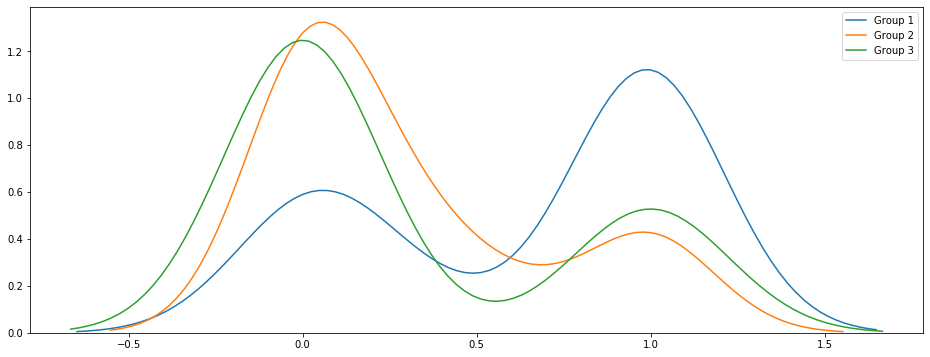

In [81]:
plt.figure(figsize=(16,6))
sns.distplot(X[1], hist=False, label="Group 1");
sns.distplot(X[2], hist=False, label="Group 2");
sns.distplot(X[0], hist=False, label="Group 3");

<h4> Anova test (one way) </h4>

In [86]:
F, p  = stats.f_oneway(X[1], X[2], X[0])

In [235]:
F

array([9.22957682e+02, 1.99998786e+03, 1.96768007e+03, 1.75454731e+03,
       1.74327423e+03, 1.61587312e+04, 1.45087082e+04, 6.63245840e+03,
       1.08639036e+04, 3.11804781e+02, 2.89499036e+02, 3.11804781e+02,
       2.89499036e+02, 4.74600644e+03, 8.70570589e+03, 8.26426406e+03,
       1.17085745e+04, 1.62578480e+04, 1.36355891e+01, 2.37397587e+03,
       3.49123375e+02, 2.37397587e+03, 1.64057069e+03, 4.34782791e+03,
       9.83945382e+02, 5.85077793e+05, 3.33383642e+05, 2.85013475e+01,
       2.99844643e+02, 1.87224922e+03, 5.62447141e+03, 5.87292681e+05,
       5.87292680e+05, 1.62628321e+02, 2.03860352e+01, 9.22957682e+02])

F value for out problem is around ~4.6 for 0.01% type 1 error rate (1% significance level)

7.92 > 4.6 therefore the difference in k-means clusters is statistically significant

In [103]:
file = pd.read_csv('data_mart_clustered.csv', sep=",", encoding='cp1251', index_col=0)

In [109]:
scaler = preprocessing.MinMaxScaler()
X = scaler.fit_transform(file.iloc[:, :-1])

In [198]:
a = X[file['cluster'] == 1]
b = X[file['cluster'] == 2]
c = X[file['cluster'] == 0]

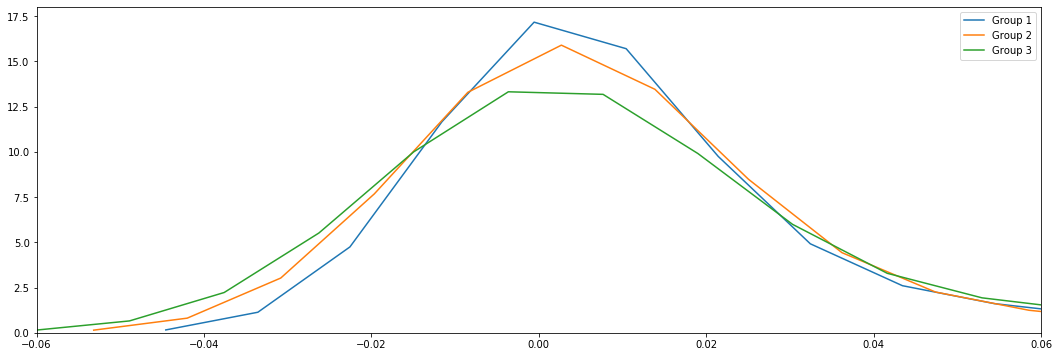

In [203]:
fig, ax = plt.subplots(figsize=(18, 6))
ax.set_xlim(-0.06, 0.06)
sns.distplot(a, hist=False, label="Cluster 1", ax=ax, norm_hist=True);
sns.distplot(b, hist=False, label="Cluster 2", ax=ax, norm_hist=True);
sns.distplot(c, hist=False, label="Cluster 3", ax=ax, norm_hist=True);

In [234]:
X.shape

(60059, 36)

<h4> Anova test (one way) </h4>

In [173]:
F, p  = stats.f_oneway(a, b, c)

In [236]:
F > 4.6

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True])

F value is around ~4.6 for 0.01% type 1 error rate (1% significance level) for our problem

F value in our case is way higher than that, therefore the difference in k-means clusters is statistically significant

<h4> Chi Square </h4>

In [226]:
e_v = np.mean(X, axis=0) # expected value

In [225]:
chi_sqr = ((np.mean(a, axis=0) - e_v)**2)/e_v + ((np.mean(b, axis=0) - e_v)**2)/e_v + ((np.mean(c, axis=0) - e_v)**2)/e_v

Chi square value is around ~9.210 for 0.01% type 1 error rate (1% significance level) for our problem, df = 2

In [233]:
chi_sqr > 0.5

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True,  True,
       False, False, False, False,  True,  True, False, False, False])